## Exploratory Data Analysis Section

### Goal

1. Investigate the top paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. Use these insights to help find the best job opportunities.

### Deliverables

- Showcase core skills in Python as well as understanding.
- Summary page *README.md* campturing findings
- Share thtis project for feedback.

### Questions 

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts, Machine Learning Engineers, and Data Scientists?
3. How well do jobs and skills pay for Machine Learning Engineers and Data Scientists?
4. What is the most optimal skill to learn for Machine Learning Engineers and Data Scientists?

We'll try to look at the job market for Africa and the entire world as well.

In [1]:
# Let's load teh datasets for our analysis.
!pip install -q datasets
!pip install -q adjustText
!pip install -q requests


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.


### EDA for all Data Roles

##### Import Libraries

In [2]:
## Importing all of the necessary libraries including the dataset
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
from adjustText import adjust_text
import requests # to get the continents for the jobs

##### Load Dataset

In [3]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [4]:
df.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785727 non-nu

##### Data Cleaning and Issues

- Wrong datatype for job_posted_date column
- Job skills column is in dictionary format.

In [6]:
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


#### Job Postings

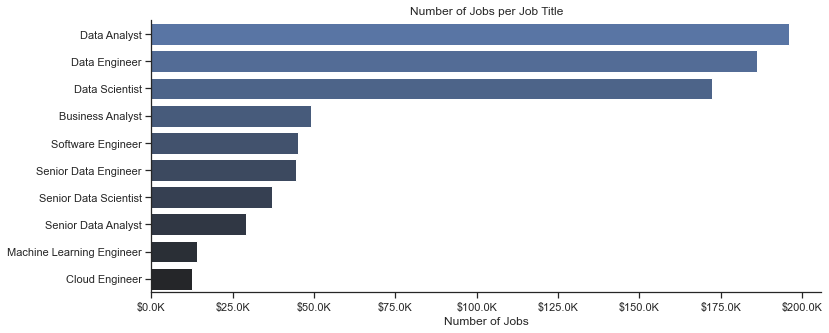

In [59]:
#Quickly look at the number of job postings for each field


df_plot = df['job_title_short'].value_counts().to_frame(name='count')
df_plot.reset_index(inplace=True)
df_plot.rename(columns={'index':'job_title_short'},inplace=True)

plt.figure(figsize=(12, 5)) 
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='job_title_short',palette='dark:b_r')
sns.despine()
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000}K'))

plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()



Notes:

- Data Analyst role lead the pack.
- Senior positions have less job postings and teh same for cloud positions.

#### Country Job Postings

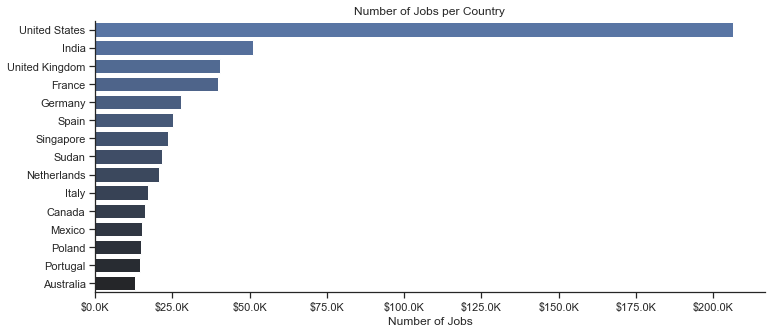

In [58]:
df_plot = df['job_country'].value_counts().to_frame(name='count').head(15)
df_plot.reset_index(inplace=True)
df_plot.rename(columns={'index':'job_country'},inplace=True)

plt.figure(figsize=(12, 5)) 
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='job_country',palette='dark:b_r')
sns.despine()
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000}K'))

plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


Notes:

- United States by far has the most job postings.


#### Job Postings by Company

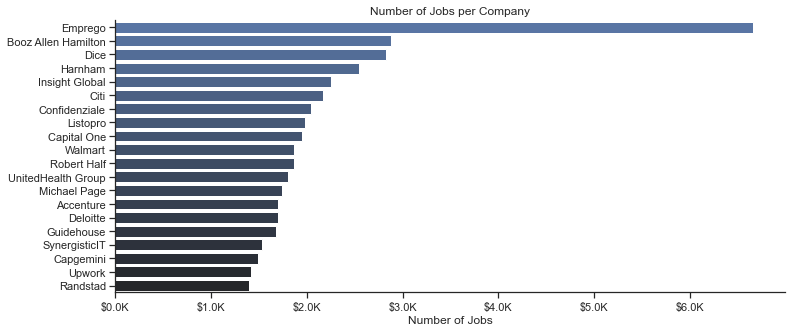

In [57]:
df_plot = df['company_name'].value_counts().to_frame(name='count').head(20)
df_plot.reset_index(inplace=True)
df_plot.rename(columns={'index':'company_name'},inplace=True)

plt.figure(figsize=(12, 5)) 
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='company_name',palette='dark:b_r')
sns.despine()
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000}K'))

plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

#### Job Schedulees Offered

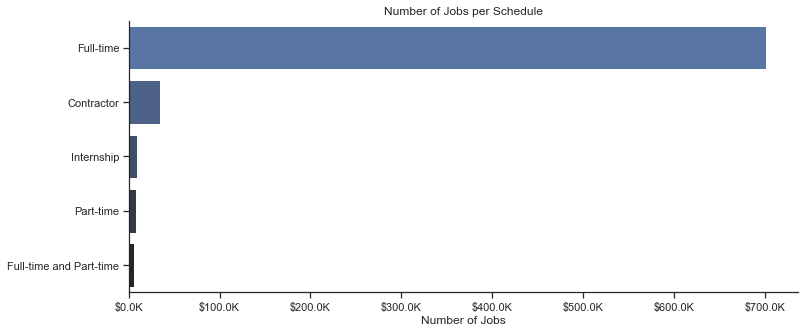

In [92]:
df_plot = df['job_schedule_type'].value_counts().to_frame(name='count').head(5)
df_plot.reset_index(inplace=True)
df_plot.rename(columns={'index':'job_schedule_type'},inplace=True)

plt.figure(figsize=(12, 5)) 
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='job_schedule_type',palette='dark:b_r')
sns.despine()
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000}K'))

plt.title('Number of Jobs per Schedule')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

#### Job Benefits and Degree Required

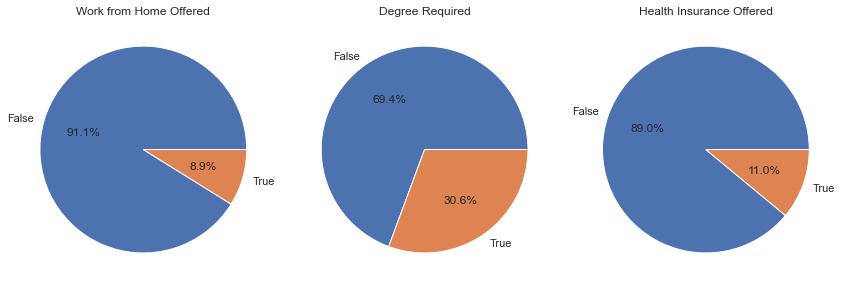

In [203]:
dict_job = {
    'job_work_from_home' : 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Required',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(12, 5))

for i, (column, title) in enumerate(dict_job.items()):
    ax[i].pie(df[column].value_counts(),labels=['False','True'],autopct='%1.1f%%')
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

In [89]:
df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [128]:
# country for analysis and per continent analysis as well
df_country = df['job_country'].value_counts().to_frame(name='count')
df_country.reset_index(inplace=True)
df_country.rename(columns={'index':'Country'},inplace=True)
df_country.drop(columns='count',inplace=True)
df_country

,Country
0,United States
1,India
2,United Kingdom
3,France
4,Germany
...,...
155,Guinea
156,Mauritania
157,Lesotho
158,Bhutan


In [129]:
!pip install -q requests

In [131]:
import requests

def get_continent(country):
    try:
        # Use the RestCountries API to fetch country information
        response = requests.get(f'https://restcountries.com/v3.1/name/{country}')
        data = response.json()
        return data[0]['continents'][0]  
    except Exception as e:
        return 'Unknown'


# Apply the function to the job_country column
df_country['continent'] = df_country['Country'].apply(get_continent)

            Country continent
0     United States   Oceania
1             India      Asia
2    United Kingdom    Europe
3            France    Europe
4           Germany    Europe
..              ...       ...
155          Guinea    Africa
156      Mauritania    Africa
157         Lesotho    Africa
158          Bhutan      Asia
159        Maldives      Asia

[160 rows x 2 columns]


In [143]:
df_country['continent'].value_counts()

Europe           43
Asia             40
Africa           39
North America    20
South America    12
Oceania           6
Name: continent, dtype: int64

In [142]:

fix_continents = {
    "United States": "North America",
    "Australia": "Oceania",
    "New Zealand": "Oceania",
    "Guam": "Oceania",
    "U.S. Virgin Islands": "North America",
    "Macedonia (FYROM)": "Europe",
    "Congo, Democratic Republic of the": "Africa",
    "Fiji": "Oceania",
    "Papua New Guinea": "Oceania",
    "Northern Mariana Islands": "Oceania"
}

# Update the continent column based on the mapping
df_country['continent'] = df_country['Country'].map(fix_continents).fillna(df_country['continent'])


            Country      continent
0     United States  North America
1             India           Asia
2    United Kingdom         Europe
3            France         Europe
4           Germany         Europe
..              ...            ...
155          Guinea         Africa
156      Mauritania         Africa
157         Lesotho         Africa
158          Bhutan           Asia
159        Maldives           Asia

[160 rows x 2 columns]


### EDA for Roles for Data Analysts

#### Filter  Data Analyst Roles Only

In [102]:
df_DA = df[df['job_title_short'].isin(['Senior Data Analyst','Data Analyst'])]
#df_DA = df[df['job_title_short'].isin(['Data Analyst'])]
df_DA.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."


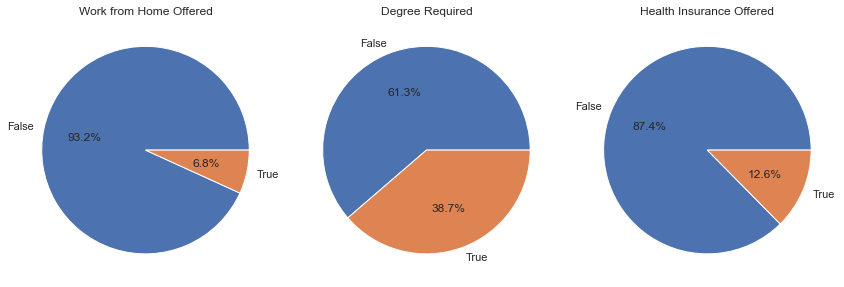

In [101]:
dict_job = {
    'job_work_from_home' : 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Required',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(12, 5))

for i, (column, title) in enumerate(dict_job.items()):
    ax[i].pie(df_DA[column].value_counts(),labels=['False','True'],autopct='%1.1f%%')
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

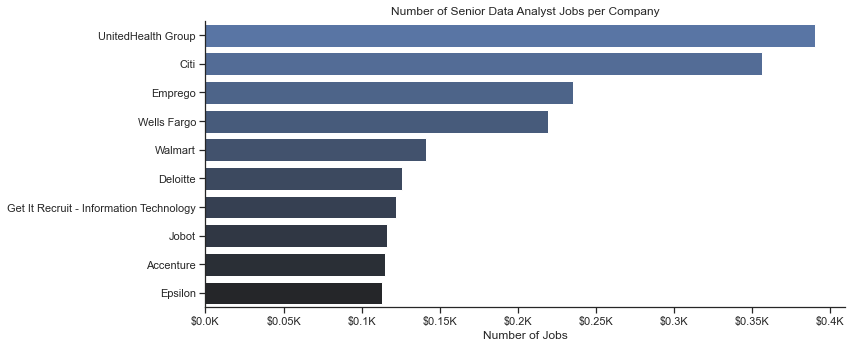

In [112]:
df_senior = df_DA[df_DA['job_title_short'].str.contains('Senior',case=False,na=False)]

df_plot = df_senior['company_name'].value_counts().to_frame(name='count').head(10)
df_plot.reset_index(inplace=True)
df_plot.rename(columns={'index':'company_name'},inplace=True)


plt.figure(figsize=(12, 5)) 

#plt.subplot(2,1)
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='company_name',palette='dark:b_r')
sns.despine()
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000}K'))

plt.title('Number of Senior Data Analyst Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')




plt.tight_layout()
plt.show()

Text(0, 0.5, '')

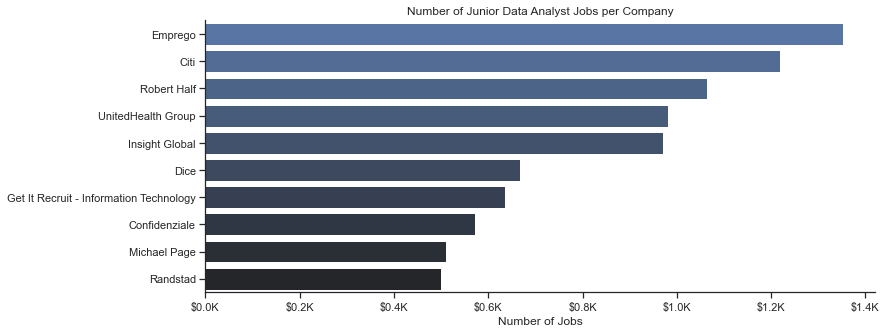

In [115]:
plt.figure(figsize=(12, 5)) 
df_plot = df_DA['company_name'].value_counts().to_frame(name='count').head(10)
df_plot.reset_index(inplace=True)
df_plot.rename(columns={'index':'company_name'},inplace=True)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='company_name',palette='dark:b_r')
sns.despine()
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000}K'))

plt.title('Number of Junior Data Analyst Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')

Text(0, 0.5, '')

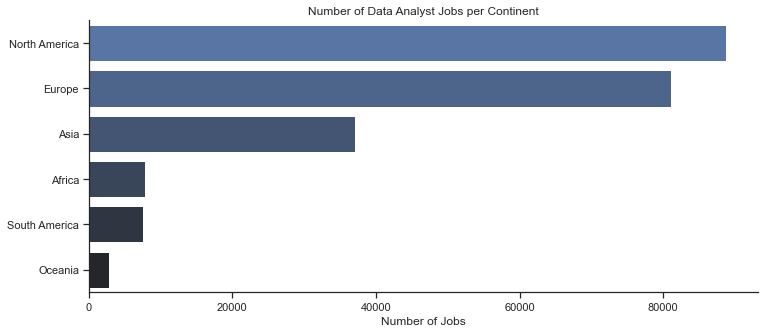

In [191]:
df_plot = df_DA['job_country'].value_counts().to_frame(name='count') ##.head(15)
df_plot.reset_index(inplace=True)
df_plot.rename(columns={'index':'job_country'},inplace=True)

df_merged = df_plot.merge(df_country, how='left',left_on='job_country',right_on='Country')

df_merged = df_merged.groupby('continent')['count'].sum().sort_values(ascending=False)

df_merged = df_merged.to_frame()  # Convert Series to DataFrame
df_merged.reset_index(inplace=True)
df_merged

plt.figure(figsize=(12, 5)) 
sns.set_theme(style='ticks')
sns.barplot(data=df_merged,x='count',y='continent',palette='dark:b_r',ci=None,)
sns.despine()
# ax = plt.gca()
# ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000}K'))

plt.title('Number of Data Analyst Jobs per Continent')
plt.xlabel('Number of Jobs')
plt.ylabel('')

#### Filter Data Engineering Roles Only

In [95]:
# Data engineer roles only
df_DE = df[df['job_title_short'].isin(['Senior Data Engineer','Data Engineer'])]
df_DE.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."


Text(0, 0.5, '')

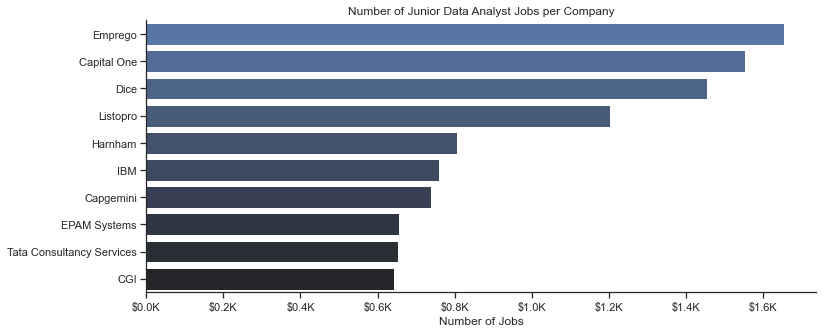

In [116]:
plt.figure(figsize=(12, 5)) 
df_plot = df_DE['company_name'].value_counts().to_frame(name='count').head(10)
df_plot.reset_index(inplace=True)
df_plot.rename(columns={'index':'company_name'},inplace=True)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='company_name',palette='dark:b_r')
sns.despine()
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000}K'))

plt.title('Number of Data Analyst Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')

Text(0, 0.5, '')

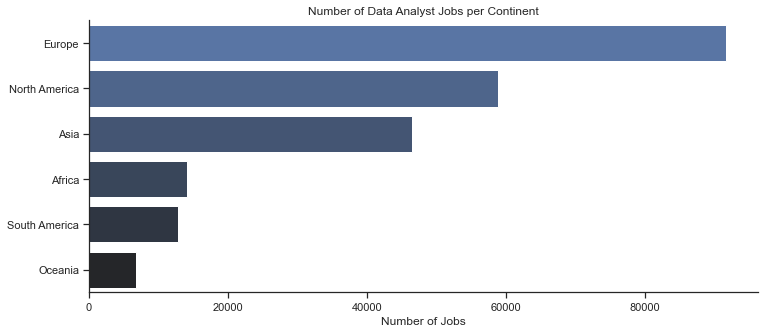

In [192]:
df_plot = df_DE['job_country'].value_counts().to_frame(name='count') ##.head(15)
df_plot.reset_index(inplace=True)
df_plot.rename(columns={'index':'job_country'},inplace=True)

df_merged = df_plot.merge(df_country, how='left',left_on='job_country',right_on='Country')

df_merged = df_merged.groupby('continent')['count'].sum().sort_values(ascending=False)

df_merged = df_merged.to_frame()  # Convert Series to DataFrame
df_merged.reset_index(inplace=True)
df_merged

plt.figure(figsize=(12, 5)) 
sns.set_theme(style='ticks')
sns.barplot(data=df_merged,x='count',y='continent',palette='dark:b_r',ci=None,)
sns.despine()
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000}K'))

plt.title('Number of Data Engineering Jobs per Continent')
plt.xlabel('Number of Jobs')
plt.ylabel('')

#### Filter Machine Learning Jobs

In [198]:
df_ML = df[df['job_title_short'].isin(['Data Scientist','Senior Data Scientist','Machine Learning Engineer'])]

Text(0, 0.5, '')

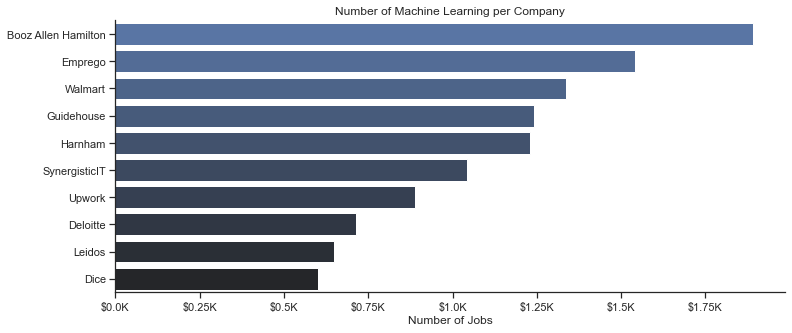

In [199]:
plt.figure(figsize=(12, 5)) 
df_plot = df_ML['company_name'].value_counts().to_frame(name='count').head(10)
df_plot.reset_index(inplace=True)
df_plot.rename(columns={'index':'company_name'},inplace=True)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='company_name',palette='dark:b_r')
sns.despine()
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000}K'))

plt.title('Number of Machine Learning per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')

Text(0, 0.5, '')

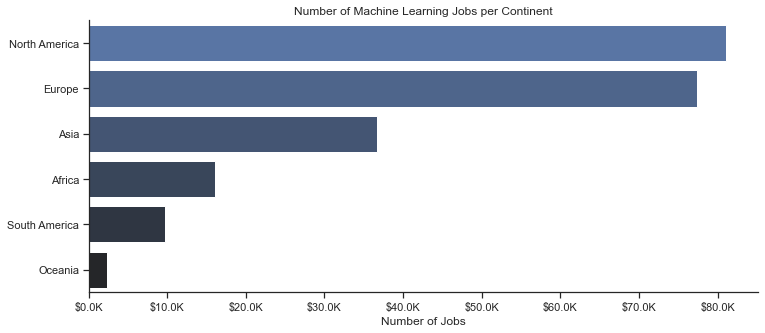

In [201]:
df_plot = df_ML['job_country'].value_counts().to_frame(name='count') ##.head(15)
df_plot.reset_index(inplace=True)
df_plot.rename(columns={'index':'job_country'},inplace=True)

df_merged = df_plot.merge(df_country, how='left',left_on='job_country',right_on='Country')

df_merged = df_merged.groupby('continent')['count'].sum().sort_values(ascending=False)

df_merged = df_merged.to_frame()  # Convert Series to DataFrame
df_merged.reset_index(inplace=True)
df_merged

plt.figure(figsize=(12, 5)) 
sns.set_theme(style='ticks')
sns.barplot(data=df_merged,x='count',y='continent',palette='dark:b_r',ci=None,)
sns.despine()
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000}K'))

plt.title('Number of Machine Learning Jobs per Continent')
plt.xlabel('Number of Jobs')
plt.ylabel('')